## Imports

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import time
import seaborn as sns
seconds = time.time()

## Data Analysis Program

This program requires the presence of the `all_data.csv` file in the same directory. The purpose of the program is to provide statistical insights about the data contained in the dataset.

Due to the varying sizes of the data, the program generates graphics in three separate groups, allowing all data to be visualized effectively:

- **Big Group**: Labels with more than 11,000 occurrences.
- **Medium Group**: Labels with occurrences between 600 and 11,000.
- **Small Group**: Labels with fewer than 600 occurrences.

The final set of graphics provides the attack rates and normal behavior rates.

### Instructions

1. Ensure the `all_data.csv` file is present in the program's directory.
2. Run the program to generate graphics and statistics.

### Program Output

The program generates visualizations and statistics for the dataset based on the label groupings. It aims to provide insights into the distribution and behavior of the data.


*Note: This program assumes that the `pandas`, `matplotlib`, `seaborn` check the imports section and make sure other required libraries are installed.*



In [40]:
#  graph creation function
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5, color='g', edgecolor='black')
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()

In [41]:
df=pd.read_feather('all_data.feather')
df = df[['Label']]
label_count = df.iloc[:,0].value_counts()
label_count_df = pd.DataFrame(label_count)
a=(df.iloc[:,0].value_counts())

key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attack=0
benign=0
label_count_df.style.background_gradient()

,count
Label,
BENIGN,2203723
DoS Hulk,231073
PortScan,158930
DDoS,41835
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [42]:
## In this section, the attacks are grouped under 3 groups,
## so that all values can be seen on the graph.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i]) 
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attack+=values[i]
        
key =[benign,attack]

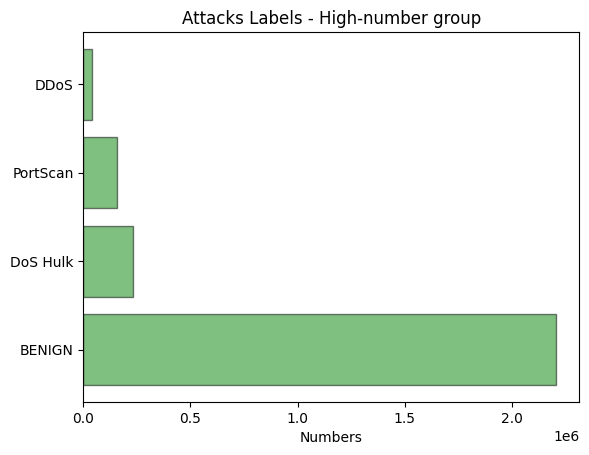

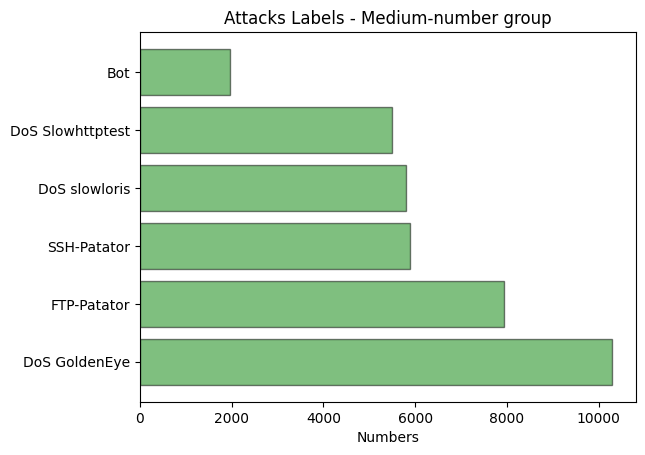

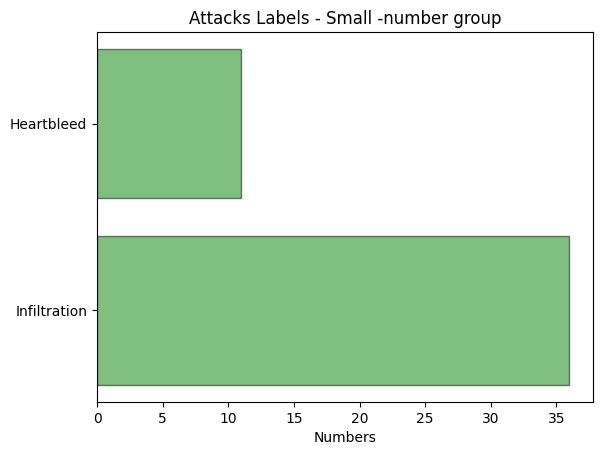

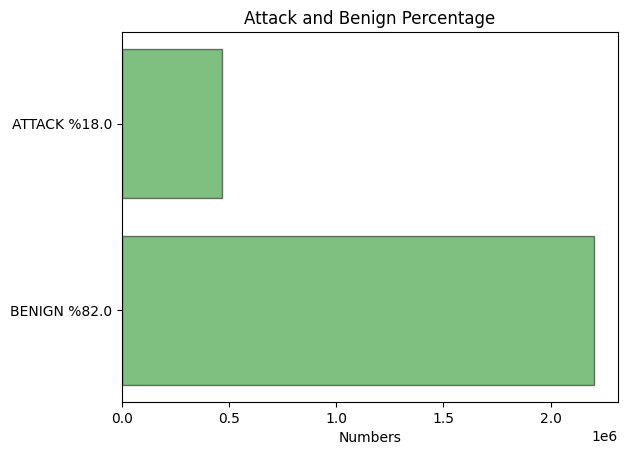

mission accomplished!
Total operation time: =  5.9890124797821045 seconds


In [43]:
#functions are called to create a chartes
labels=["BENIGN %"+str(round(benign/(benign+attack),2)*100),
        "ATTACK %"+str(round(attack/(benign+attack),2)*100)]
graph(big_labels,big_values,"Numbers","Attacks Labels - High-number group")
graph(medium_labels,medium_values,"Numbers","Attacks Labels - Medium-number group")
graph(small_labels,small_values,"Numbers","Attacks Labels - Small -number group")
graph(labels,key,"Numbers","Attack and Benign Percentage")

print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

In [44]:
dat = pd.read_feather('all_data.feather')
pd.set_option('display.max_columns', 200)
dat

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,External IP
0,228571,7953,80,2751,49188,6,12231,4,2,0,12.0,0.0,6.0,6.0,6.000000,0.00000,0.0,0.0,0.0,0.0,3000000,500000,4.0,0.000000,4.0,4.0,4.0,4.0,0.00000,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,5.000000e+05,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0.0,9.0,6.000000,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
1,228571,7953,80,2751,49188,6,12231,1,2,0,12.0,0.0,6.0,6.0,6.000000,0.00000,0.0,0.0,0.0,0.0,12000000,2000000,1.0,0.000000,1.0,1.0,1.0,1.0,0.00000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0.0,9.0,6.000000,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
2,228571,7953,80,2751,49188,6,12231,1,2,0,12.0,0.0,6.0,6.0,6.000000,0.00000,0.0,0.0,0.0,0.0,12000000,2000000,1.0,0.000000,1.0,1.0,1.0,1.0,0.00000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0.0,9.0,6.000000,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
3,228571,7953,80,2751,49188,6,12231,1,2,0,12.0,0.0,6.0,6.0,6.000000,0.00000,0.0,0.0,0.0,0.0,12000000,2000000,1.0,0.000000,1.0,1.0,1.0,1.0,0.00000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0.0,9.0,6.000000,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
4,55580,7951,80,2743,49486,6,12232,3,2,0,12.0,0.0,6.0,6.0,6.000000,0.00000,0.0,0.0,0.0,0.0,4000000,666666,3.0,0.000000,3.0,3.0,3.0,3.0,0.00000,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,6.666667e+05,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0.0,9.0,6.000000,0.0,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672992,58649,703,22,861,37758,6,92,85,1,2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0,35294,42.5,7.778175,48.0,37.0,0.0,0.0,0.00000,0.0,0.0,48.0,48.0,0.0,48.0,48.0,0,0,0,0,32,64,1.176471e+04,23529.411760,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,2.0,0.0,0.000000,0.0,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
2672993,53823,695,59111,1230,443,6,92,113,2,0,12.0,0.0,6.0,6.0,6.000000,0.00000,0.0,0.0,0.0,0.0,106194,17699,113.0,0.000000,113.0,113.0,113.0,113.0,0.0

<Axes: xlabel='count', ylabel='Label'>

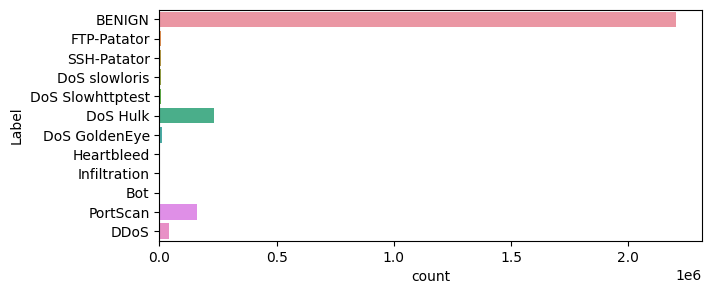

In [45]:
plt.figure(figsize=(7,3))
sns.countplot(data=dat, y='Label')

In [9]:
dat.describe().style.background_gradient()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000,2672997.000000
mean,83233.407333,1858.350204,41190.745760,2511.604479,8074.584664,9.802197,2816.248785,14933892.796157,9.282604,10.291804,551.037511,15998.208082,210.061028,18.516680,58.839819,70.205927,898.440420,40.374370,314.564602,347.828345,1471863.745026,71759.644221,1320805.203304,3001340.625424,9475400.671583,163010.461785,14629772.405926,2651981.871195,3391192.456498,9334494.263952,1015317.675923,9823930.544616,1807957.859492,1523673.871229,4759189.226128,957442.720803,0.046539,0.000000,0.000118,0.000000,-27546.655447,-2424.123119,64787.254578,7047.257574,16.128984,980.666804,176.222146,304.842756,510566.129536,0.036811,0.046539,0.000237,0.301536,0.318131,0.093640,0.000118,0.000238,0.684473,196.607531,58.839819,314.564602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.282604,551.026414,10.291804,15998.111296,7025.949356,1963.151840,5.284198,-2905.006456,82191.804365,40840.429108,152792.301497,58964.582702,8596543.854861,525954.210637,8993221.874787,8185719.948991
std,66909.171990,1052.141052,22195.241657,1567.190044,18278.468021,5.237134,6233.554185,33758217.288305,754.780563,1005.209942,10199.588455,2266150.671317,730.156296,61.587018,190.218701,287.345262,1989.754936,68.770868,618.205260,859.905243,25631157.177406,255839.103028,4526295.909977,8157704.616163,24930103.116185,2958966.999916,33683331.177699,9537893.135460,9863526.845771,25003180.388295,8561970.372247,28615373.

In [10]:
df_cleaned = dat.loc[:, (dat != 0).any()]

In [11]:
matrix = df_cleaned.select_dtypes(include=['int64', 'float64']).corr()

<Axes: >

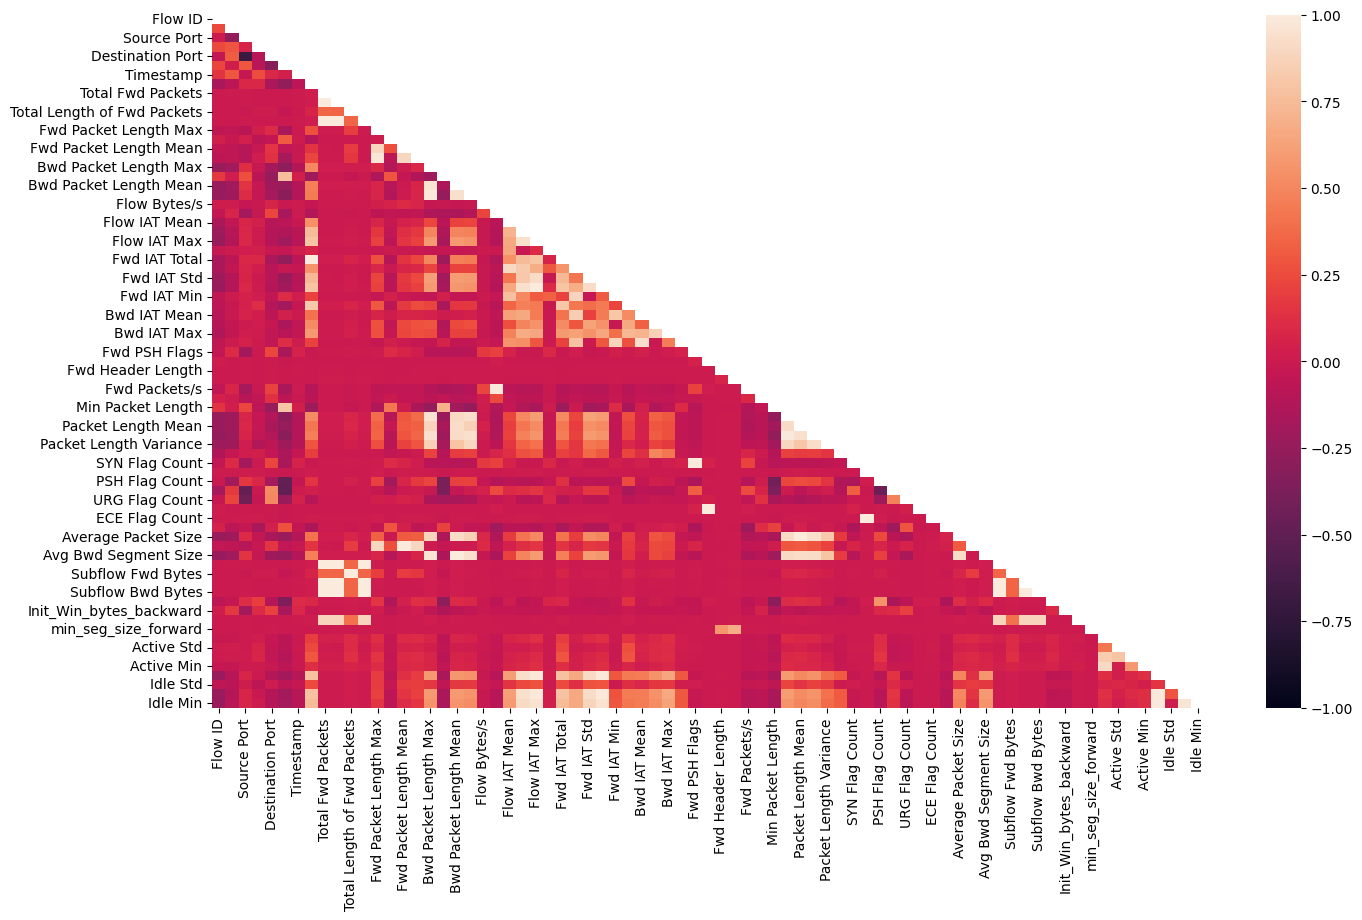

In [12]:
plt.figure(figsize=(16,9))
mask = np.triu(matrix)
sns.heatmap(matrix, mask = mask, vmin=-1, vmax=1)

<Axes: xlabel='Average Packet Size', ylabel='Label'>

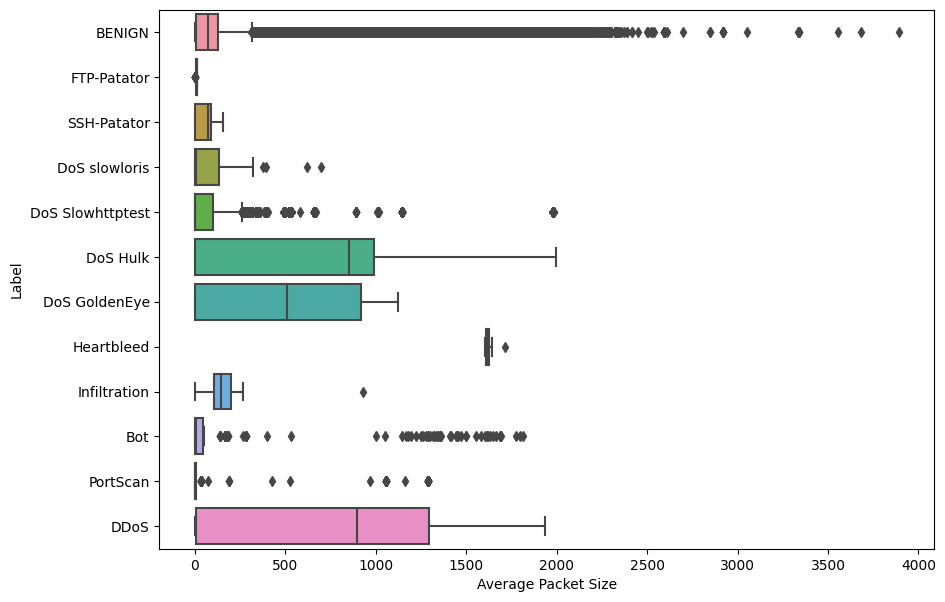

In [58]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dat, x='Average Packet Size', y='Label')

Outliers in a box plot are data points that fall significantly outside the overall distribution of the data. When you see more outliers for the "Benign" label, it could suggest the following:

Higher Variability: The "Benign" label may have higher variability or a wider spread of average packet sizes compared to the "Attack" label. This could be due to a range of factors, such as diverse types of benign network traffic or a broader range of sources.

In [59]:
dat.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

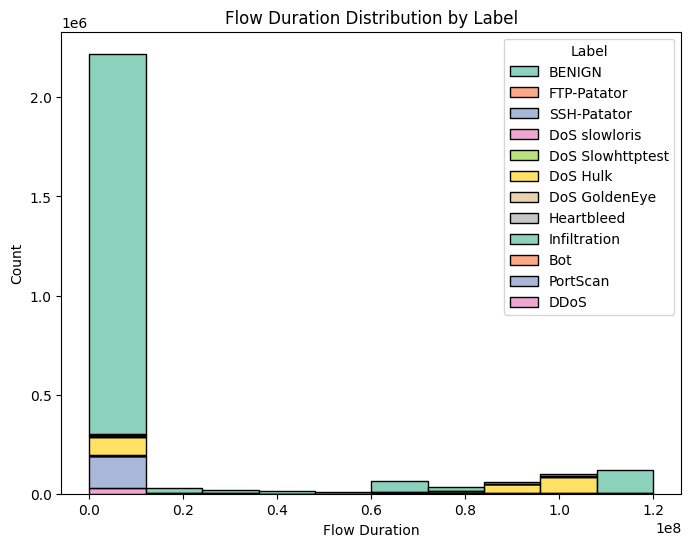

In [61]:
# Flow Duration Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(data=dat, x='Flow Duration', bins=10, hue='Label', multiple='stack', palette='Set2')
plt.title('Flow Duration Distribution by Label')
plt.xlabel('Flow Duration')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='Protocol', ylabel='Flow Duration'>

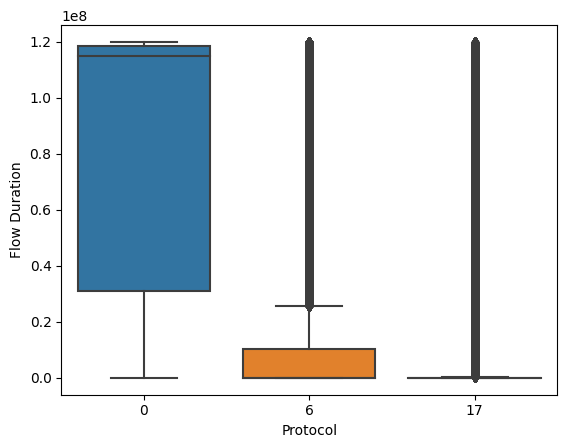

In [78]:
sns.boxplot(data=dat, x='Protocol', y='Flow Duration')